Analyze and compare two geospatial datasets
The choice of the datasets is free, but a few constraints must be observed.
	• Use at least 2 different datasets (e.g. model and observations, n different models, 2 different observational datasets, etc.)
	• Perform at least 1 operation in space and 1 operation in time (e.g. aggregation, normalization, resampling, regridding, etc.)
	• Display data both as a function of space and time (time series and maps)
	• Apply some sort of statistical analysis on the data (arrange the data according to some pdf, hypothesis testing, time series analysis, detection of trends, classification, pattern detection, ...)

# Setting librerie

In [1]:
import numpy as np
import xarray as xr
import seaborn as sns
import cmocean
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
%matplotlib inline
%config InlinedBackend.figure_format = 'retina'
import warnings
warnings.simplefilter(action='ignore')

# Lettura e esplorazione dataset

In [2]:
# in generale

# https://rda.ucar.edu/datasets/ds277.0/docs/NetCDF_README
# NOAA Optimum Interpolation Sea Surface Temperature V2 (OISSTv2)

# The OISSTv2 product uses a simplified linear relationship with sea-ice concentration to infer SST under sea ice (Reynolds et al. 2007), which means SSTs may be too cool by up to 0.2°C where there is sea-ice cover.

# https://nsidc.org/data/g10016/versions/2


## Dataset temperatura media superficiale del mare a livello mensile

In [3]:
# FONTE PRINCIPALE: https://psl.noaa.gov/data/gridded/data.noaa.oisst.v2.html


# ! wget https://www.esrl.noaa.gov/psd/thredds/fileServer/Datasets/noaa.ersst.v5/sst.mnmean.nc
# ! gunzip sst.mnmean.nc
sst_data = xr.open_dataset('C:/Users/loren/Desktop/sst.mnmean.nc')  # https://psl.noaa.gov/repository/entry/show?entryid=cac1c2a6-a864-4409-bb77-1fdead8eeb6e
sst_data  # sea_surface_temperature (degC) sst

# volendo anche cosi si può aprire il dataset
# url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
# ds = xr.open_dataset(url, drop_variables=['time_bnds'])


<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 2019, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2022-03-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    sst        (time, lat, lon) float32 ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2022-05-01

In [4]:
sst_data.attrs

{'climatology': 'Climatology is based on 1971-2000 SST, Xue, Y., T. M. Smith, and R. W. Reynolds, 2003: Interdecadal changes of 30-yr SST normals during 1871.2000. Journal of Climate, 16, 1601-1612.',
 'description': 'In situ data: ICOADS2.5 before 2007 and NCEP in situ data from 2008 to present. Ice data: HadISST ice before 2010 and NCEP ice after 2010.',
 'keywords_vocabulary': 'NASA Global Change Master Directory (GCMD) Science Keywords',
 'keywords': 'Earth Science > Oceans > Ocean Temperature > Sea Surface Temperature >',
 'instrument': 'Conventional thermometers',
 'source_comment': 'SSTs were observed by conventional thermometers in Buckets (insulated or un-insulated canvas and wooded buckets) or Engine Room Intaker',
 'geospatial_lon_min': -1.0,
 'geospatial_lon_max': 359.0,
 'geospatial_laty_max': 89.0,
 'geospatial_laty_min': -89.0,
 'geospatial_lat_max': 89.0,
 'geospatial_lat_min': -89.0,
 'geospatial_lat_units': 'degrees_north',
 'geospatial_lon_units': 'degrees_east',
 'c

Si hanno i dati della temperatura superificiale del mare con granularità mensile.

Viene utilizzato il primo giorno del mese alle ore 00.00.00 per indicare il label del mese.

In particolare si hanno i dati mensili da gennaio 1854 a marzo 2022, per un totale di 2019 istanti temporali.

La griglia è composta da 85 bande di latitudine (ovvero avremo 85 valori di latitudine) e 180 bande di longitudine.

per comprendere bande lat e long:
https://www.settorezero.com/wordpress/basi-della-cartografia-convertiamo-latitudine-e-longitudine-da-base60-a-decimale-il-sistema-sessagesimale-e-i-suoi-utilizzi-pratici/

nel caso comprendere se ad esempio 88 è la linea o la banda?!


la longitudine possiamo convertirla da -180 a 180 al posto di avere da 0 a 360

# We can traspose it to [-180,180] - in tanti anche online fanno questa conversione quindi ci sta farla

ts1.coords['lon'] = (ts1.coords['lon'] + 180) % 360 - 180
ts1 = ts1.sortby(ts1.lon)



# The number of elements is the same along the lat dimension (145), meaning that each grid cell is
#  identified (for the y-dimension) by the "centroid" rather than the "edges" of the grid cell.
# The "edges" of the grid cells are stored in lat_bnds.
# Note that the first and last elements of lat (the two poles) are an exception, because these particular
#  grid cells are identified not by the centroids, but by the outer edges!



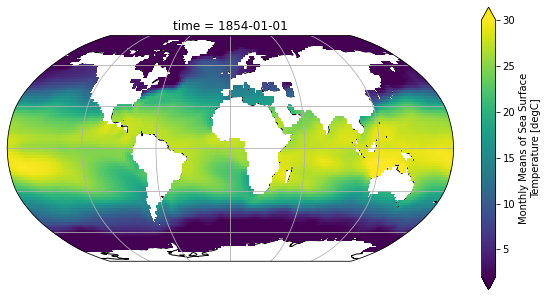

In [5]:
# per un mese specifico, gennaio dell'anno 1854
sst = sst_data.sst.sel(time='1854-01-01', method='nearest')
fig = plt.figure(figsize=(10,13))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()
sst.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=2, vmax=30, cbar_kwargs={'shrink': 0.4})

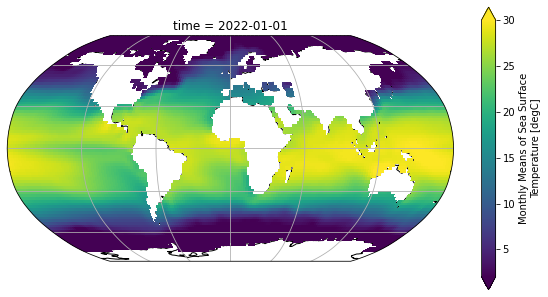

In [6]:
# per un mese specifico, gennaio dell'anno 2022
sst = sst_data.sst.sel(time='2022-01-01', method='nearest')
fig = plt.figure(figsize=(10,13))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()
sst.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=2, vmax=30, cbar_kwargs={'shrink': 0.4})

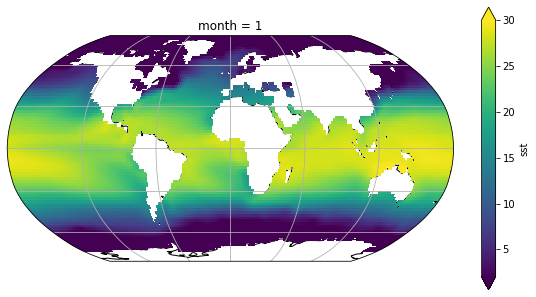

In [7]:
# gennaio medio

sst = sst_data.sst.groupby('time.month').mean('time')  # medie di tutti i mesi per tutti gli anni
sst[0,:,:]  # seleziono il solo mese di gennaio (media di tutti i gennai nel dataset di tutti gli anni)

sst = sst[0,:,:]
fig = plt.figure(figsize=(10,13))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()
sst.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=2, vmax=30, cbar_kwargs={'shrink': 0.4})

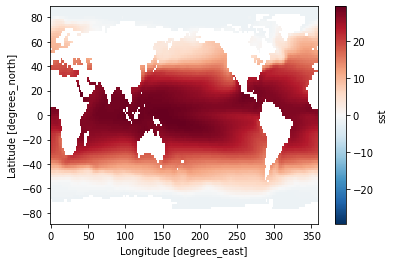

In [8]:
# si comprime la dimensione del tempo calcolando la media
# viene riportata la media della variabile sst lungo la linea del tempo
sst_data.sst.mean(axis=0).plot()

Da questi plot si può dunque notare che le temperature più basse si verificano nei pressi dei poli mentre avvicinandosi all'equatore le temperature aumentano in modo graduale. Inoltre ad una prima vista ad alto livello non si notano differenze nette nel corso degli anni, vedi 1854 vs 2022.

In [9]:
sst_data

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 2019, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2022-03-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
    sst        (time, lat, lon) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan nan
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2022-05-01

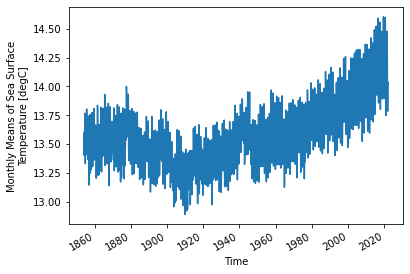

In [10]:
# è una grande media, quindi un'aggregazione spaziale a differenza di fare l'interpolazione

sst_data.mean(("lon", "lat"), keep_attrs=True).sst.plot()  # a livello mensile

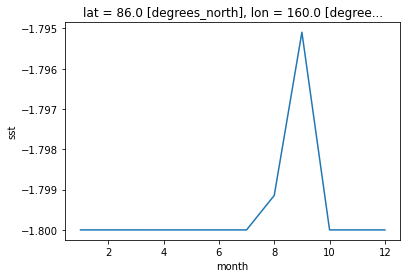

In [46]:
sst_data.lat[1]  # 86
sst_data.lon[80]  # 160
# queste coordinate si vedono in alto al grafico

sst_data.sst.groupby("time.month").mean("time")[:,1,80].plot()  # dunque questa è la temeratura media a livello mensile per la cella 86:160

In [56]:
sst_data.sst.isel(time=5,lat=slice(0,15))  # questo è polo nord o polo sud??

<xarray.DataArray 'sst' (lat: 15, lon: 180)>
array([[-1.8     , -1.8     , -1.8     , ..., -1.8     , -1.8     , -1.8     ],
       [-1.8     , -1.8     , -1.8     , ..., -1.8     , -1.8     , -1.8     ],
       [-1.8     , -1.8     , -1.8     , ..., -1.8     , -1.8     , -1.8     ],
       ...,
       [ 7.639557,  8.114134,  8.350101, ...,  6.08004 ,  6.452414,  7.01405 ],
       [ 8.368179,  8.755888,  8.987194, ...,  7.57679 ,  7.659569,  7.944469],
       [ 8.829226,  9.173323,  9.480677, ...,  8.746309,  8.556439,  8.562125]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... 68.0 66.0 64.0 62.0 60.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
    time     datetime64[ns] 1854-06-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

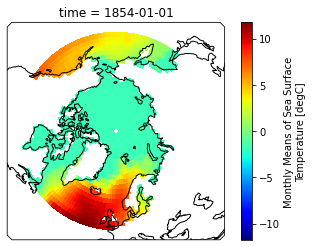

In [59]:
# ci focalizziamo sul polo sud
# questo potrebbe essere utile per le nostre analisi in particolare per i ghiacci

# Focus on the poles (e.g. South Pole)
# We use "plot"


# faccio slice sulle lat, prendo i primi 15 elementi di lat e tutte le longitidudini
p1a = sst_data.sst.isel(time=0,lat=slice(0,20)).plot(transform=ccrs.PlateCarree(),
                subplot_kws={'projection': ccrs.Orthographic(central_longitude=0.0, central_latitude=90)},   # messo +90 per polo nord?? prima era sud e ed era -90
                                                            cmap='jet')
p1a.axes.coastlines()

# dovrebbe essere polo nord , vedi https://www.google.com/search?q=polo+nord&sxsrf=ALiCzsZ_eygOUHgqEHG7fIBQ6lSXpTzLwg:1651851809597&source=lnms&tbm=isch&sa=X&ved=2ahUKEwick9TCm8v3AhUmRfEDHY2qDW0Q_AUoAnoECAIQBA&biw=1440&bih=757&dpr=1#imgrc=txk_DHzN_-gKMM


# ha senso fare questi grafici per capire meglio dove sonoi ghiaccia dato che si concentrano nei poli
# qui tra l'altro stiamo guardando la temperatura

## Dataset concentrazione di ghiaccio a livello mensile

The parameter of this data set is sea ice concentration which is the fraction of ocean area covered
by sea ice. Sea ice concentration represents an areal coverage of sea ice. For a given grid cell, the
parameter provides an estimate of the fractional amount of sea ice covering that cell, with the
remainder of the area consisting of open ocean. Land areas are coded with a land mask value.

In [11]:
# FONTE PRINCIPALE: https://psl.noaa.gov/data/gridded/data.noaa.oisst.v2.html

# ! wget https://www.esrl.noaa.gov/psd/thredds/fileServer/Datasets/noaa.oisst.v2/icec.mnmean.nc
# ! gunzip icec.mnmean.nc
icec_data = xr.open_dataset('C:/Users/loren/Desktop/icec.mnmean.nc')  # https://psl.noaa.gov/repository/entry/show?entryid=6463fdab-ecff-4ba3-acf4-3a1490d7bae0
icec_data  # Ice Concentration Mean Surface

# The ice field shows the approximate monthly average of the ice concentration values input to the SST analysis. Ice concentration is stored as the percentage of area covered. For the ice fields, the land and coast grid cells have been set to the netCDF missing value.

# https://climatedataguide.ucar.edu/climate-data/sea-ice-concentration-data-noaa-oi

<xarray.Dataset>
Dimensions:    (time: 484, lat: 180, lon: 360, nbnds: 2)
Coordinates:
  * lat        (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2022-03-01
Dimensions without coordinates: nbnds
Data variables:
    icec       (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:51:42 2005: ncks -d time,0,278 SAVEs/icec.m...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    NCO:            4.0.0
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

In [65]:
valori = icec_data.icec
type(valori)
valori_df = valori.to_dataframe()  # sono già valori da zero a cento
valori_df  # attenzione perchè 0 è diverso da nan, 0 indica che non c'è ghiaccio mentre nan indica che è terra ferma

icec
time       lat   lon         
1981-12-01  89.5 0.5    100.0
                 1.5    100.0
                 2.5    100.0
                 3.5    100.0
                 4.5    100.0
...                       ...
2022-03-01 -89.5 355.5    NaN
                 356.5    NaN
                 357.5    NaN
                 358.5    NaN
                 359.5    NaN

[31363200 rows x 1 columns]

In [12]:
icec_data.attrs

{'title': 'NOAA Optimum Interpolation (OI) SST V2',
 'Conventions': 'CF-1.0',
 'history': 'Wed Apr  6 13:51:42 2005: ncks -d time,0,278 SAVEs/icec.mnmean.nc icec.mnmean.nc\nCreated 10/2002 by RHS\nN.B. The land values in this ice concentration data set have been set to the missing value of 32767.  The land values vary with time.',
 'comments': 'Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmith, D.C. Stokes, and W. Wang, 2002: An Improved In Situ and Satellite\nSST Analysis for Climate, J. Climate',
 'platform': 'Model',
 'source': 'NCEP Climate Modeling Branch',
 'institution': 'National Centers for Environmental Prediction',
 'References': 'https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2.html',
 'NCO': '4.0.0',
 'dataset_title': 'NOAA Optimum Interpolation (OI) SST V2',
 'source_url': 'http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/'}

Si hanno i dati della concentrazione di ghiaccio con granularità mensile. Vi sono valori null in corrispondenza della terra ferma.

Viene utilizzato il primo giorno del mese alle ore 00.00.00 per indicare il label del mese.

In particolare si hanno i dati mensili da dicembre 1981 a marzo 2022, per un totale di 484 istanti temporali.

La griglia è composta da 180 bande di latitudine e 360 bande di longitudine.

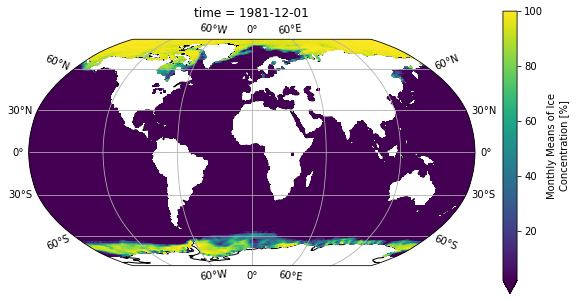

In [62]:
# per un mese specifico, gennaio dell'anno 1854
sst = icec_data.icec.sel(time='1981-12-01', method='nearest')
fig = plt.figure(figsize=(10,13))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines(draw_labels=True)
sst.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=2, vmax=100, cbar_kwargs={'shrink': 0.4})  # ATTENZIONE QUI DEVO CONSIDERARE BENE LE SCALE, CAPIRE CHE VALORI SONO LE CONCENTRAZIONI DI GHIACCIO

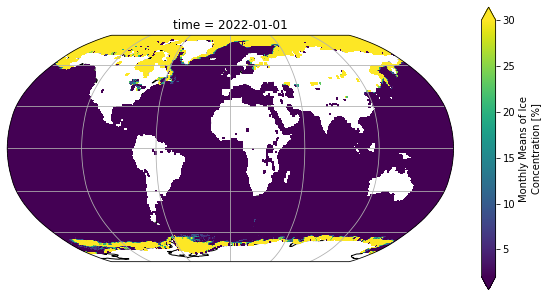

In [14]:
# per un mese specifico, gennaio dell'anno 2022
sst = icec_data.icec.sel(time='2022-01-01', method='nearest')
fig = plt.figure(figsize=(10,13))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()
sst.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=2, vmax=30, cbar_kwargs={'shrink': 0.4})

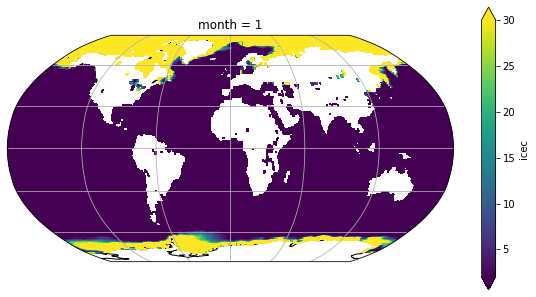

In [15]:
# gennaio medio

sst = icec_data.icec.groupby('time.month').mean('time')  # medie di tutti i mesi per tutti gli anni
sst[0,:,:]  # seleziono il solo mese di gennaio (media di tutti i gennai nel dataset di tutti gli anni)

sst = sst[0,:,:]
fig = plt.figure(figsize=(10,13))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines()
sst.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=2, vmax=30, cbar_kwargs={'shrink': 0.4})

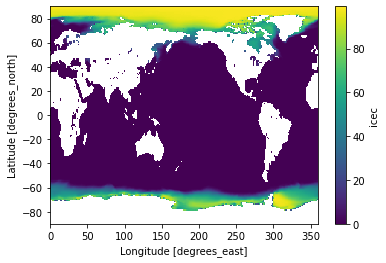

In [16]:
# si comprime la dimensione del tempo calcolando la media
# viene riportata la media della variabile icec lungo la linea del tempo
icec_data.icec.mean(axis=0).plot()

A differenza del dataset delle temperature superficiali dell'acqua in questo caso le differenze tra gli anni sono evidenti, vedi 1854 vs 2022

# Test regridding

In [17]:
# sarò necessario se devo fare confronti diretti tra i due dataset

# interpolo d2 su d1 essendo la griglia di d2 più grande

# i valori ovviamente cambiano

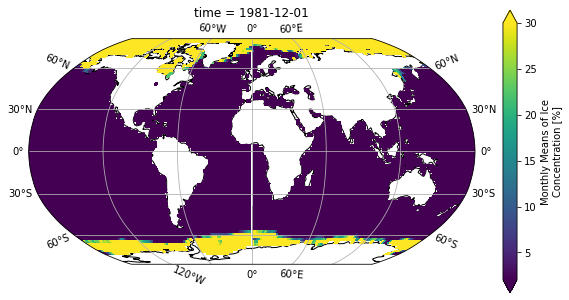

In [18]:
d1 = sst_data
d2 = icec_data

d2i_lin = d2.interp(lat=d1.lat, lon=d1.lon, method='linear')  # è il tipo (linear) più utilizzato, la griglia è quella dell'altro modello, il secondo modello è stato riportato sulla griglia del primo
d2i_lin.icec



# per un mese specifico
sst = d2i_lin.icec.sel(time='1981-12-01', method='nearest')
fig = plt.figure(figsize=(10,13))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines(draw_labels=True)
sst.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=2, vmax=30, cbar_kwargs={'shrink': 0.4})

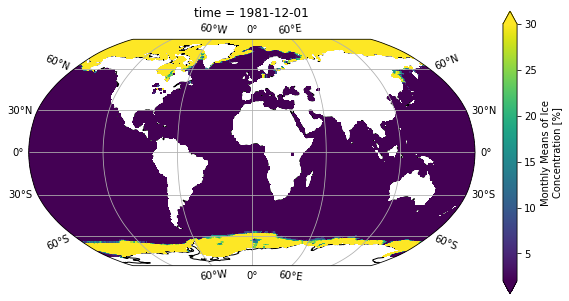

In [20]:
icec_data.icec



# per un mese specifico
sst = icec_data.icec.sel(time='1981-12-01', method='nearest')
fig = plt.figure(figsize=(10,13))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.gridlines(draw_labels=True)
sst.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=2, vmax=30, cbar_kwargs={'shrink': 0.4})

In [ ]:
# non si riescono ad apprezzare grandi differenze tra versione originale e regriddata

# Confronti

In [ ]:
# è cambiata la temperatura dell'acqua superficiale negli anni
# è cambiata la concentrazione dei ghiacci negli anni
# correlazione temperatura e concentrazione ghiacci, andamento negli anni
# calcolo anomalie
# concentrarsi su un'area specifica (ad esempio i poli che alla fine è dove si registrano più cambiamenti) o su un periodo specifico, con una specifica granularità
# confrontarsi con ciò che si continua a dire che i ghiaccia si stanno sciogliendo ecc ? è vero?
# fare previsione su temperature e concentrazione ghiaccio per i prossimi anni

# rivedere concetto media pesata per interopolazione: grid-cell areas weighting, utilizzare un peso proporzionale alle aree delle celle
# per fare l'aggregazione spaziale è importante considerare che su uan griglia lat e long le aeree delle celle sono diverse, tendono a diminuire verso i poli. Risulta dunque necessario effettuare una media pesata con i pesi che siano proporzionali alle aree delle celle. Si può usare ad esempio la funzione coseno per creare questi pesi
# funzione cos
# ottengo una serie di pesi che sono deifniti per ciascuna banda di latitudine
# il primo peso infatti è molto piccolo, siamo vicini ad un polo, e poi verso l'equatore diventano più grandi

# (5) Second step of spatial aggregation: derive the global time series from the gridded dataset
# devo fare un'aggregazione di tutte le celle
# Here we have the options of a simple arithmetic average, or a weighted average
# The weights could be on several levels, e.g.
# - a measure of the density of observations or their coherence
# - the unequal areas covered by each grid cell
# - the unequal proportions of land vs ocean in different grid cells
# - ...
# in ogni caso la media aritmetica è incorretta, meglio usare quella pesata (modulo 2)

# capire se ha senso interpolazione normale e se è necessaria
# do un occhio ai dati, tipo crutem, ispl e i modelli ts amon micro mri ispl ecc.

# regridding diverso da aggregazione spaziale


# il regridding probabilmente mi servirà se devo fare dei confornti in cui ho dati che non sono ancora a livello globale, ma nel caso in cui opero a livello globale, quindi faccio uan media su lat e long a quel punto non mi interessa più avere la stessa griglia con lo stesso numero di lat e long tanto orami sto suando una sintesi globale.

In [ ]:
# potremmo pensare anche di selezionare una finestra temporale dato che non hanno tutti gli anni in comune

In [ ]:
# risolvere questioni grdi, eventualmente convertire long da 0 360 a -180 a 180, capire se sono centroidi o meno

In [ ]:
# settare bene scale per percentuali di ghiaccio, prima arrivanao come le temp fino al max a 30 ma il valore in questo caso è percentuale, da 0 a 100

In [ ]:
# https://www.repubblica.it/green-and-blue/2022/03/23/news/il_caldo_record_ai_poli_che_allarma_gli_scienziati-342549265/
#
# ci sono tanti articoli a riguardo, temp e sciogliemtno ghiacciai
#
# concentrarsi su anomalie di temp ai poli